In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
def reduce_mem_usage(df):
    
    start_mem=df.memory_usage().sum()
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type=df[col].dtype
        
        if col_type != object:
            c_max=df[col].min()
            c_min=df[col].max()
            if str(col_type)[:3]=='int':
                if c_min >np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col]=df[col].astype(np.int8)
                elif c_min >np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col]=df[col].astype(np.int16)
                elif  c_min >np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col]=df[col].astype(np.int32)
                elif  c_min >np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col]=df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col]=df[col].astype('category')
    end_mem=df.memory_usage().sum()
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df        

In [3]:
sample_feature = reduce_mem_usage(pd.read_csv('data_for_tree.csv'))

Memory usage of dataframe is 60507328.00 MB
Memory usage after optimization is: 14134137.00 MB
Decreased by 76.6%


In [10]:
sample_feature=pd.read_csv('data_for_tree.csv')

In [11]:
continous_feature_names=[x for x in sample_feature.columns if x not in ['price','brand','model','brand']]

In [12]:
sample_feature=sample_feature.dropna().replace('-',0).reset_index(drop=True)
sample_feature['notRepairedDamage'] =sample_feature['notRepairedDamage'].astype(np.float32)
train = sample_feature[continous_feature_names + ['price']]

train_X =train[continous_feature_names]
train_Y=train['price']

In [13]:
from sklearn.linear_model import LinearRegression

In [9]:
train_X.fillna(0)

,name,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,seller,offerType,v_0,...,used_time,city,brand_amount,brand_price_average,brand_price_max,brand_price_medina,brand_price_min,brand_price_std,brand_price_sum,power_bin
0,736,1.0,0.0,0.0,60,12.5,0.0,0,0,43.357796,...,4385,1.0,10193.0,3576.37,35990.0,1800.0,13.0,4562.233331,36457518.0,5.0
1,14874,1.0,0.0,0.0,163,12.5,0.0,0,0,45.978359,...,4382,2.0,1458.0,9851.83,45000.0,8500.0,100.0,5425.058140,14373814.0,16.0
2,111080,1.0,0.0,0.0,68,5.0,0.0,0,0,44.383511,...,1531,6.0,4662.0,3305.67,31500.0,2300.0,20.0,3344.689763,15414322.0,6.0
3,137642,0.0,1.0,0.0,109,10.0,0.0,0,0,46.323165,...,2482,3.0,13994.0,8076.76,92900.0,5200.0,15.0,8244.695287,113034210.0,10.0
4,2402,0.0,0.0,1.0,150,15.0,0.0,0,0,46.104335,...,6185,3.0,16575.0,8342.13,99999.0,5999.0,12.0,8089.863295,138279069.0,14.0
5,165346,1.0,0.0,0.0,101,15.0,0.0,0,0,42.255586,...,6108,4.0,16073.0,3053.17,38990.0,1700.0,12.0,3605.595127,49076652.0,10.0
6,2974,2.0,1.0,1.0,179,15.0,0.0,0,0,46.084888,...,4798,4.0,13656.0,9082.86,84000.0,6399.0,15.0,8988.865406,124044603.0,17.0
7,18961,3.0,1.0,0.0,101,15.0,0.0,0,0,45.401241,...,3874,1.0,7299.0,2439.08,68530.0,1400.0,50.0,2975.342884,17805271.0,10.0
8,74495,2.0,0.0,0.0,75,2.0,0.0,0,0,44.355984,...,2936,5.0,10193.0,3576.37,35990.0,1800.0,13.0,4562.233331,36457518.0,7.0
9,120103,1.0,0.0,0.0,58,6.0,0.0,0,0,42.309224,...,5493,2.0,16073.0,3053.17,38990.0,1700.0,12.0,3605.595127,49076652.0,5.0


In [14]:
train_X.isna().any()

name                   False
bodyType               False
fuelType               False
gearbox                False
power                  False
kilometer              False
notRepairedDamage      False
seller                 False
offerType              False
v_0                    False
v_1                    False
v_2                    False
v_3                    False
v_4                    False
v_5                    False
v_6                    False
v_7                    False
v_8                    False
v_9                    False
v_10                   False
v_11                   False
v_12                   False
v_13                   False
v_14                   False
train                  False
used_time              False
brand_amount           False
brand_price_average    False
brand_price_max        False
brand_price_medina     False
brand_price_min        False
brand_price_std        False
brand_price_sum        False
power_bin              False
dtype: bool

In [15]:
model = LinearRegression(normalize=True)
model = model.fit(train_X,train_Y)

In [16]:
'interept:'+str(model.intercept_)
sorted(dict(zip(continous_feature_names,model.coef_)).items(),key=lambda x:x[1],reverse=True)

[('v_11', 4280446467.246338),
 ('v_12', 875412560.4607698),
 ('v_3', 142257043.04622743),
 ('v_13', 4586849.3442071425),
 ('v_6', 3374326.7050232138),
 ('v_8', 611865.6691335349),
 ('offerType', 311926.3700209423),
 ('seller', 239145.4713612236),
 ('v_9', 81872.10151206452),
 ('gearbox', 844.8895535771591),
 ('fuelType', 271.1221890133822),
 ('bodyType', 185.32269893723395),
 ('power', 26.779124082279814),
 ('brand_price_medina', 0.5111006852578537),
 ('brand_price_std', 0.49203697518427214),
 ('train', 0.1817321077461686),
 ('brand_amount', 0.1233885604173515),
 ('brand_price_max', 0.005328205451313818),
 ('brand_price_sum', -1.6713862257086275e-05),
 ('name', -0.0001536101942306881),
 ('used_time', -0.0357212181978428),
 ('brand_price_average', -0.2927401302046636),
 ('brand_price_min', -2.3488580407322304),
 ('power_bin', -32.039873874695814),
 ('notRepairedDamage', -335.23141637084336),
 ('kilometer', -357.3959483695846),
 ('v_7', -26920.3184413322),
 ('v_14', -59250.51806369937),


In [17]:
from matplotlib import pyplot as plt

In [18]:
subsample_index = np.random.randint(low=0,high=len(train_Y),size=50)

The predicted price is obvious different from true price


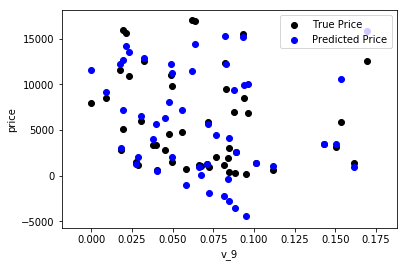

In [19]:
plt.scatter(train_X['v_9'][subsample_index],train_Y[subsample_index],color='black')
plt.scatter(train_X['v_9'][subsample_index],model.predict(train_X.loc[subsample_index]),color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price is obvious different from true price')
plt.show()

It is clear to see the price shows a typical exponential distribution


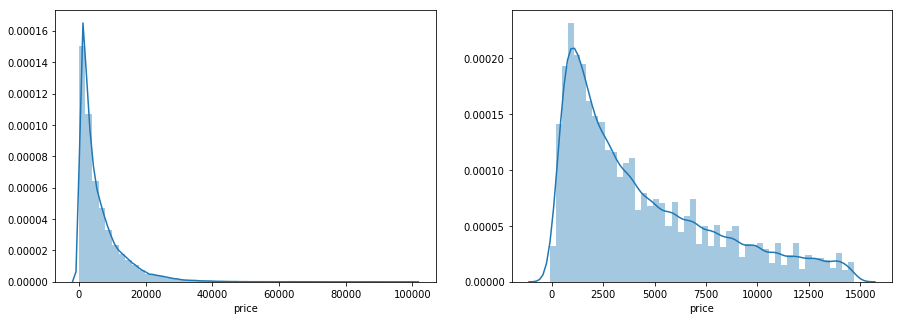

In [20]:

print('It is clear to see the price shows a typical exponential distribution')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_Y)
plt.subplot(1,2,2)
sns.distplot(train_Y[train_Y<np.quantile(train_Y,0.9)])

In [21]:
train_Y_ln=np.log(train_Y+1)

In [24]:
train_Y_ln[train_Y_ln.isnull()]=0

The transformed price seems like normal distribution


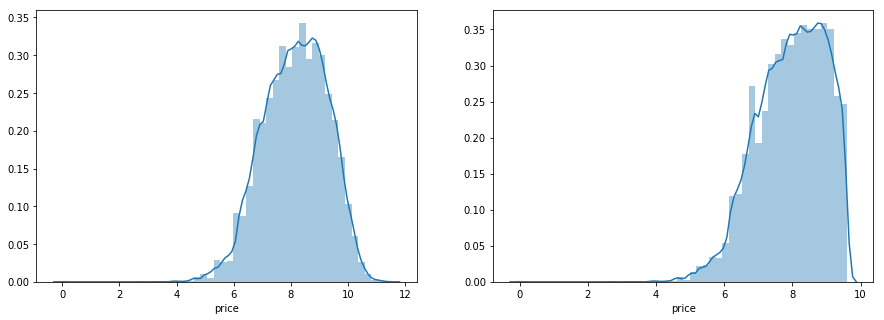

In [25]:
print('The transformed price seems like normal distribution')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_Y_ln)
plt.subplot(1,2,2)
sns.distplot(train_Y_ln[train_Y_ln < np.quantile(train_Y_ln, 0.9)])

In [26]:
model = model.fit(train_X,train_Y_ln)

print('intercept:'+ str(model.intercept_))
sorted(dict(zip(continous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

intercept:-256280.90721457996


[('v_1', 158948.40068516304),
 ('v_10', 131413.8759364868),
 ('v_2', 63052.83223070392),
 ('v_0', 5856.558669834276),
 ('v_4', 83.77541414430405),
 ('v_14', 2.884012160631222),
 ('fuelType', 0.006687591161159415),
 ('bodyType', 0.005385254310246651),
 ('gearbox', 0.004482633981981849),
 ('power_bin', 0.0036333552404010047),
 ('power', 0.0012570334952014906),
 ('brand_price_min', 9.517307061557905e-06),
 ('brand_amount', 4.762571820105852e-06),
 ('used_time', 1.2580103515335836e-06),
 ('brand_price_max', 5.605582018817629e-07),
 ('brand_price_average', 8.807696882227606e-08),
 ('brand_price_sum', -5.23922368417246e-10),
 ('name', -3.8668469753690115e-08),
 ('brand_price_medina', -2.5189432778173134e-06),
 ('brand_price_std', -1.0831507265697004e-05),
 ('kilometer', -0.013470215463834053),
 ('train', -0.02919451518361839),
 ('notRepairedDamage', -0.2083369733713748),
 ('seller', -5.853319769738107),
 ('offerType', -7.634743322035064),
 ('v_7', -111.26761543913099),
 ('v_9', -153.16887649

The predicted price seems normal after np.log transforming


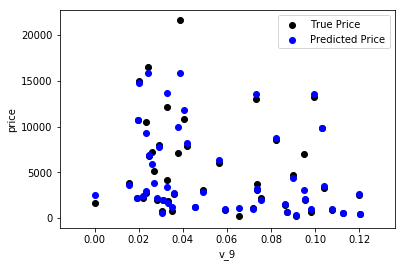

In [21]:
plt.scatter(train_X['v_9'][subsample_index], train_Y[subsample_index], color='black')
plt.scatter(train_X['v_9'][subsample_index], np.exp(model.predict(train_X.loc[subsample_index])), color='blue')
plt.xlabel('v_9')
plt.ylabel('price')
plt.legend(['True Price','Predicted Price'],loc='upper right')
print('The predicted price seems normal after np.log transforming')
plt.show()

In [30]:
#5折交叉验证
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,make_scorer

In [23]:
def log_transfer(func):
    def wrapper(y,yhat):
        result=func(np.log(y),np.nan_to_num(np.log(yhat)))
        return result
    return warapper       

In [24]:
scores = cross_val_score(model,X=train_X,y=train_Y_ln,verbose=1,cv=5,scoring=make_scorer(mean_absolute_error))
print('AVG:', np.mean(scores))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AVG: 0.17260845445520537


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished


In [25]:
scores=pd.DataFrame(scores.reshape(1,-1))
scores.columns=['cv' + str(x) for x in range(1,6)]
scores.index=['MAE']
scores

,cv1,cv2,cv3,cv4,cv5
MAE,0.189308,0.192497,0.189953,0.173116,0.118168


In [26]:
import datetime

In [27]:
sample_feature = sample_feature.reset_index(drop=True)
split_point = len(sample_feature)//5*4

In [29]:
train = sample_feature.loc[:split_point].dropna()
val= sample_feature.loc[split_point:].dropna()

train_X=train[continous_feature_names]
train_Y_ln=np.log(train['price'] + 1)
val_X=val[continous_feature_names]
val_Y_ln=np.log(val['price']+1)

In [30]:
train_Y_ln[train_Y_ln.isnull()]=0
val_Y_ln[val_Y_ln.isnull()]=0

In [31]:
model=model.fit(train_X,train_Y_ln)
mean_absolute_error(val_Y_ln,model.predict(val_X))

0.11816946863230773

In [32]:
from sklearn.model_selection import learning_curve, validation_curve

In [33]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_size=np.linspace(.1, 1.0, 5 )):  
    plt.figure()  
    plt.title(title)  
    if ylim is not None:  
        plt.ylim(*ylim)  
    plt.xlabel('Training example')  
    plt.ylabel('score')  
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_size, scoring = make_scorer(mean_absolute_error))  
    train_scores_mean = np.mean(train_scores, axis=1)  
    train_scores_std = np.std(train_scores, axis=1)  
    test_scores_mean = np.mean(test_scores, axis=1)  
    test_scores_std = np.std(test_scores, axis=1)  
    plt.grid()#区域  
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,  
                     train_scores_mean + train_scores_std, alpha=0.1,  
                     color="r")  
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,  
                     test_scores_mean + test_scores_std, alpha=0.1,  
                     color="g")  
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',  
             label="Training score")  
    plt.plot(train_sizes, test_scores_mean,'o-',color="g",  
             label="Cross-validation score")  
    plt.legend(loc="best")  
    return plt  

<module 'matplotlib.pyplot' from 'D:\\Program Files\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

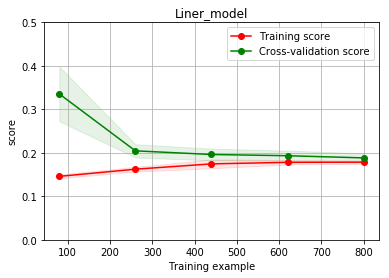

In [34]:
plot_learning_curve(LinearRegression(), 'Liner_model', train_X[:1000], train_Y_ln[:1000], ylim=(0.0, 0.5), cv=5, n_jobs=1)  

In [35]:
train = sample_feature[continous_feature_names + ['price']].dropna()
train_X = train[continous_feature_names]
train_Y = train['price']
train_Y_ln = np.log(train_Y + 1)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [37]:
models=[LinearRegression(),Ridge(),Lasso()]
train_Y_ln[train_Y_ln.isnull()]=0

In [38]:
result=dict()
for model in models:
    model_name=str(model).split('(')[0]
    scores = cross_val_score(model,X=train_X,y=train_Y_ln,verbose=0,cv=5,scoring=make_scorer(mean_absolute_error))
    result[model_name]=scores
    print(model_name+'is finished')

LinearRegressionis finished
Ridgeis finished
Lassois finished


In [39]:
result = pd.DataFrame(result)
result.index = ['cv'+str(x) for x in range(1,6)]
result

,LinearRegression,Ridge,Lasso
cv1,0.189272,0.194079,0.382641
cv2,0.192449,0.197002,0.383782
cv3,0.189919,0.194690,0.380541
cv4,0.173102,0.178012,0.368944
cv5,0.118179,0.122957,0.330481


In [40]:
model = LinearRegression().fit(train_X,train_Y_ln)
print('intercept:'+ str(model.intercept_)
sns.barplot(abs(model.coef_), continous_feature_names)

SyntaxError: invalid syntax (<ipython-input-40-558c88a70e85>, line 3)

intercept:-0.014047397226224945


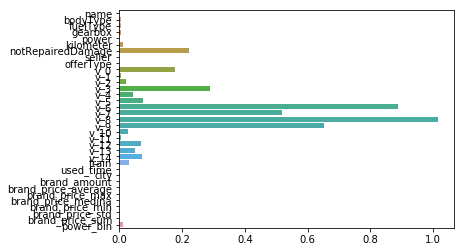

In [41]:
model = Ridge().fit(train_X, train_Y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continous_feature_names)

intercept:8.676944550012491


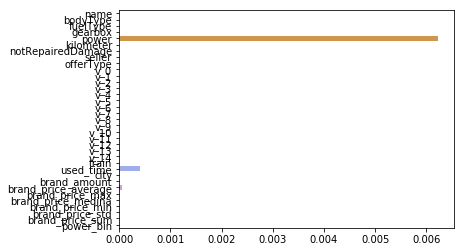

In [42]:
model = Lasso().fit(train_X, train_Y_ln)
print('intercept:'+ str(model.intercept_))
sns.barplot(abs(model.coef_), continous_feature_names)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

In [44]:
models=[LinearRegression(),
       DecisionTreeRegressor(),
       RandomForestRegressor(),
       GradientBoostingRegressor(),
       MLPRegressor(solver='lbfgs',max_iter=100),
       XGBRegressor(n_estimators=100,objective='reg:squarederror'),
       LGBMRegressor(n_estimators=100)]

In [46]:
result=dict()
for model in models:
    model_name=str(model).split('(')[0]
    scores = cross_val_score(model,X=train_X,y=train_Y_ln,verbose=0,cv=5,scoring=make_scorer(mean_absolute_error))
    result[model_name]=scores
    print(model_name+'is finished')

LinearRegressionis finished
DecisionTreeRegressoris finished
RandomForestRegressoris finished
GradientBoostingRegressoris finished
MLPRegressoris finished
XGBRegressoris finished
LGBMRegressoris finished


In [47]:
result = pd.DataFrame(result)
result.index = ['cv'+str(x) for x in range(1,6)]
result

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor,LGBMRegressor
cv1,0.189272,0.183414,0.136770,0.170893,184.038881,NaN,NaN
cv2,0.192449,0.187302,0.138243,0.174917,194.410255,NaN,NaN
cv3,0.189919,0.185688,0.136363,0.170537,112.198854,NaN,NaN
cv4,0.173102,0.171210,0.120211,0.151584,322.027992,NaN,NaN
cv5,0.118179,0.169357,0.091337,0.090995,294.920901,NaN,NaN


In [28]:
#LGB的参数集合
objective = ['regression', 'regression_l1', 'mape', 'huber', 'fair']
num_leaves = [3,5,10,15,20,40, 55]
max_depth = [3,5,10,15,20,40, 55]
bagging_fraction = []
feature_fraction = []
drop_rate = []

In [31]:
#贪心调参
best_obj=dict()
for obj in objective:
    model=LGBMRegressor(objective=obj)
    score = np.mean(cross_val_score(model,X=train_X,y=train_Y_ln,verbose=0,cv=5,scoring=make_scorer(mean_absolute_error)))
    best_obj[obj]=score
best_leaves=dict()
for leaves in num_leaves:
    model = LGBMRegressor(objective=min(best_obj.items(), key=lambda x:x[1])[0], num_leaves=leaves)
    score=np.mean(cross_val_score(model,X=train_X,y=train_Y_ln,verbose=0,cv=5,scoring=make_scorer(mean_absolute_error)))
    cross_val_score(model,X=train_X,y=train_Y_ln,verbose=0,cv=5,scoring=make_scorer(mean_absolute_error))
    best_leaves[leaves]=score
    
best_depth=dict()
for depth in max_depth:
    model = LGBMRegressor(objective=min(best_obj.items(), key=lambda x:x[1])[0],
                          num_leaves=min(best_leaves.items(), key=lambda x:x[1])[0],
                          max_depth=depth)
    score = np.mean(cross_val_score(model, X=train_X, y=train_Y_ln, verbose=0, cv = 5, scoring=make_scorer(mean_absolute_error)))
    best_depth[depth] = score
 

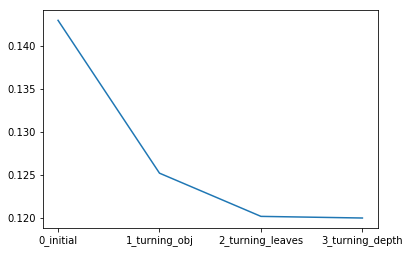

In [32]:
sns.lineplot(x=['0_initial','1_turning_obj','2_turning_leaves','3_turning_depth'], y=[0.143 ,min(best_obj.values()), min(best_leaves.values()), min(best_depth.values())])

In [33]:
best_obj

{'regression': 0.12591439095608165,
 'regression_l1': 0.12726089749099803,
 'mape': 0.1284284903877046,
 'huber': 0.1252341940371501,
 'fair': 0.12710896046599734}

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
parameters={'objective':objective,'num_leaves':num_leaves,'max_depth':max_depth}
model=LGBMRegressor()
clf=GridSearchCV(model,parameters,cv=5)

In [36]:
clf = clf.fit(train_X, train_Y)
clf.best_params_

{'max_depth': 15, 'num_leaves': 55, 'objective': 'regression'}

In [37]:
#贝叶斯调参
from bayes_opt import BayesianOptimization

In [39]:
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import cross_val_score
def rf_cv(num_leaves,max_depth,subsample,min_child_samples):
    val=cross_val_score(
    LGBMRegressor(objective='regression_l1',
                 num_leaves=int(num_leaves),
                 max_depth='max_depth',
                 subsample=subsample,
                 min_child_samples=int(min_child_samples)
                 ),
                  X=train_X,y=train_Y_ln,verbose=0,cv=5,scoring=make_scorer(mean_absolute_error)
    ).mean()
    return 1-val

In [40]:
rf_bo=BayesianOptimization(
rf_cv,
    {
        'num_leaves':(2,100),
        'max_depth':(2,100),
        'subsample':(0.1,1),
        'min_child_samples':(2,100)
    }
)

In [41]:
rf_bo.maximize()

|   iter    |  target   | max_depth | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------
|  1        |  nan      |  62.54    |  78.16    |  15.19    |  0.6939   |
|  2        |  nan      |  63.64    |  90.49    |  73.5     |  0.6975   |
|  3        |  nan      |  28.29    |  89.64    |  77.73    |  0.1153   |
|  4        |  nan      |  66.45    |  58.6     |  62.97    |  0.367    |
|  5        |  nan      |  59.77    |  30.23    |  13.27    |  0.2628   |


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

0         7.523481
1         8.736007
2         7.783641
3         8.556606
4         8.987322
5         8.160804
6         6.908755
7         7.955425
8         6.478510
9         8.039480
10        8.603554
11        7.378384
12        8.039480
13        8.071219
14        9.259226
15        8.216358
16        6.673298
17        7.280008
18        6.396930
19        9.132487
20        8.202756
21        7.937732
22        7.783224
23        8.497195
24        8.006368
25        8.117014
26        9.465060
27        6.746412
28        9.758520
29        8.603554
            ...   
161505    7.710728
161506    9.857353
161507    7.267931
161508    8.723714
161509    9.029145
161510    8.852946
161511    7.085904
161512    7.539741
161513    6.072473
161514    9.926498
161515    9.178306
161516    5.985004
161517    6.715118
161518    8.208035
161519    9.675371
161520    9.819500
161521    9.393690
161522    6.757503
161523    8.352596
161524    6.680435
161525    7.831118
161526    8.

name                   False
bodyType               False
fuelType               False
gearbox                False
power                  False
kilometer              False
notRepairedDamage      False
seller                 False
offerType              False
v_0                    False
v_1                    False
v_2                    False
v_3                    False
v_4                    False
v_5                    False
v_6                    False
v_7                    False
v_8                    False
v_9                    False
v_10                   False
v_11                   False
v_12                   False
v_13                   False
v_14                   False
train                  False
used_time              False
brand_amount           False
brand_price_average    False
brand_price_max        False
brand_price_medina     False
brand_price_min        False
brand_price_std        False
brand_price_sum        False
power_bin              False
dtype: bool